In [3]:
from statistics import mean
import numpy as np
import random

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [5]:
#using simple sample data
x = np.array([1,2,3,4,5,6], dtype=np.float64)
y = np.array([5,4,6,5,6,7], dtype=np.float64)


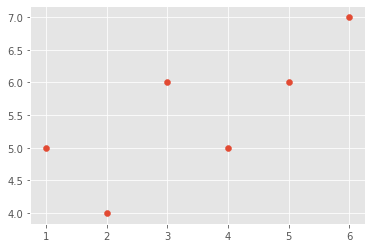

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
#linear regression's aim is to look for the best fit line
#recall y=mx + c
#where m is the slope and c is the y_intercept
def best_fit_slope_and_y_intercept(x,y):
    m = ( ((mean(x) * mean(y)) - (mean(x*y))) / 
        ((mean(x)*mean(x)) - mean(x*x)) )
    c = mean(y) - m*mean(x)
    return m, c

m,c= best_fit_slope_and_y_intercept(x,y)
print(m,c)
    

0.42857142857142866 4.0


In [8]:
regression_line = [(m*x)+c for x in x]

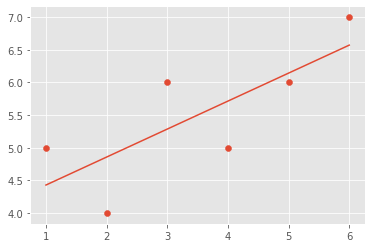

In [9]:
plt.scatter(x,y)
plt.plot(x,regression_line)
plt.show()

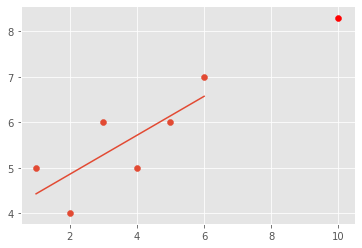

In [10]:
#since mx+c is the model
test_x = 10
predict_y = (m*test_x)+c
plt.scatter(x,y)
plt.scatter(test_x,predict_y, color='r')
plt.plot(x,regression_line)
plt.show()

In [11]:
#to determine the accuracy of the best fit line(regression line)
#i have to find the co-efficient of determination
def squared_error(y_orig,y_line):
    return sum((y_line-y_orig)**2)
def coefficient_of_determination(y_orig,y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_reg = squared_error(y_orig,y_line)
    squared_error_y_mean = squared_error(y_orig,y_mean_line)
    return 1 - (squared_error_reg/squared_error_y_mean)


In [12]:
accuracy = coefficient_of_determination(y,regression_line)
print(accuracy)

0.5844155844155845


In [42]:
#creating fresh dataset for the model with random
def create_dataset(hm , variance , step=2, correlation=False):
    val = 1
    y = []
    for i in range(hm):
        z= val + random.randrange(-variance,variance)
        y.append(z)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    x=[i for i in range(len(y))]
    return np.array(x,dtype=np.float64) , np.array(y, dtype=np.float64)

x,y= create_dataset(40,10,2,correlation='pos')

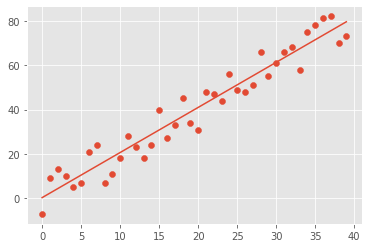

0.9331955231554929


In [43]:
#using the above model
def best_fit_slope_and_y_intercept(x,y):
    m = ( ((mean(x) * mean(y)) - (mean(x*y))) / 
        ((mean(x)*mean(x)) - mean(x*x)) )
    c = mean(y) - m*mean(x)
    return m, c

m,c= best_fit_slope_and_y_intercept(x,y)
regression_line = [(m*x)+c for x in x]
plt.scatter(x,y)
plt.plot(x,regression_line)
plt.show()
accuracy = coefficient_of_determination(y,regression_line)
print(accuracy)